In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def L(d, sigma_N, s):
    """define a gaussian likelihood of data(d) given signal (s) (and noise variance sigma_N)"""
    exponent = -0.5*np.sum((d-s)**2/sigma_N**2)
    return np.exp(exponent)/np.sqrt(np.product(2.0*np.pi*sigma_N**2))

In [4]:
def Prior(s, sigma_S):
    """Gaussian prior on signal (s) with standard deviation sigma_S"""
    exponent = -0.5*(s**2/sigma_S**2)
    return np.exp(exponent)/np.sqrt(2.0*np.pi*sigma_S**2)

In [5]:
#analytical expression of the Evidence
def Evidence_ana(d, sigma_N, sigma_S, N):
    """Evidence computed using analytical formula when likelihood as well as prior both are gaussian"""
    t0 = np.sum(1.0/sigma_N**2)+1.0/sigma_S**2
    t1 = np.sqrt(np.product(2.0*np.pi*sigma_N**2))*np.sqrt(2.0*np.pi*sigma_S**2)
    t2 = -0.5*(np.sum(d**2/sigma_N**2) - np.sum(d/sigma_N**2)**2/t0)
    t3 = np.sqrt(2.0*np.pi/t0)
    return np.exp(t2)*t3/t1

In [6]:
#Evidence INTEGRAND
def Evidence_integrand(s, d, sigma_N, sigma_S, N):
    """Evidence integrand (to be integrated numerically with respect to the data (d))"""
    return L(d, sigma_N, s)*Prior(s, sigma_S)

In [7]:
#generate toy data
#number of data points
N = 10
#errorbar on the data (standard deviation)
sigma_N = np.ndarray(shape = (N))
#data array
d = np.ndarray(shape = (N))

#true signal
true_s = 0.0
#signal prior standard deviation
sigma_S = 0.1

#assign noise standard deviation
sigma_N.fill(0.5)

In [8]:
#say, prior signal is equal to true signal
prior_s = true_s

In [9]:
#generate data (with random seed fixed for reproducibility)
np.random.normal(12345)
d = true_s + np.random.normal(0.0, sigma_N, N)
np.shape(d)

(10,)

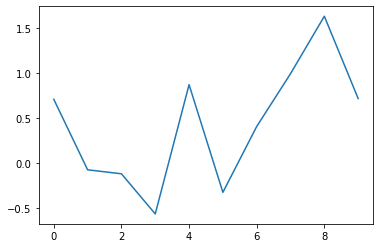

In [10]:
#plot toy data
plt.plot(d)

Text(0.5, 0, '$s$')

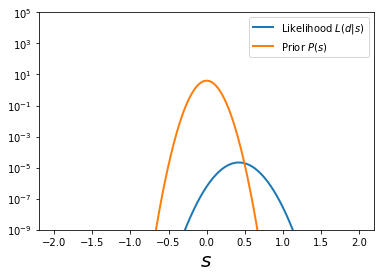

In [11]:
#plot likelihood as a function of signal and prior as a function of signal
x = np.arange(-2, 2, 0.01)
f = np.ndarray(shape = (len(x)))
g = np.ndarray(shape = (len(x)))
for i in np.arange(0, len(x), 1):
    f[i] = L(d, sigma_N, x[i])#*Prior(x[i], sigma_S)
    g[i] = Prior(x[i], sigma_S)
plt.plot(x, f, lw = 2.0, label = r"Likelihood $L(d|s)$")
plt.plot(x, g, lw = 2.0, label = r"Prior $P(s)$")
plt.legend(loc = 'upper right', fontsize = 10)
plt.ylim(1e-9, 1e5)
plt.yscale('log')
plt.xlabel(r"$s$", fontsize = 20)

In [14]:
#Analytical evidence
ana_E = Evidence_ana(d, sigma_N, sigma_S, N)
print("Analytically obtained evidence is ", ana_E)

Analytically obtained evidence is  1.429150810553276e-06


In [16]:
#Compute the evidence by directly integrating the product of likelihood and prior

#First, generate the grid
x = np.arange(-2.0, 2.0, 0.0005)
y = np.ndarray(shape = (len(x)))

for i in np.arange(0, len(x), 1):
    y[i] = Evidence_integrand(x[i], d, sigma_N, sigma_S, N)

#integrate
comp_Evidence = np.trapz(y=y, x=x)
print("Numerically integrated evidence is ", comp_Evidence)

Numerically integrated evidence is  1.429150810553278e-06


## verify that evidence is prior weighted sum of likelihood at sample values

In [21]:
#draw samples from the gaussian prior with mean 'prior_s' and standard deviation 'sigma_S'
N_samples = 30000
prior_samples = np.random.normal(prior_s, sigma_S, N_samples)

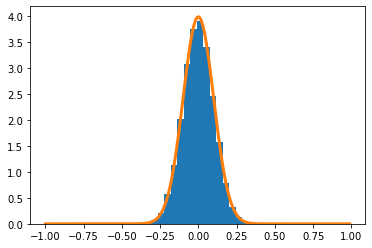

In [23]:
#plt the samples and the prior
plt.hist(prior_samples, density = True, bins=20)
x = np.arange(-1, 1, 0.01)
g = np.ndarray(shape = (len(x)))
for i in np.arange(0, len(x), 1):
    g[i] = Prior(x[i], sigma_S)
plt.plot(x, g, lw = 3.0)
plt.yscale('linear')

In [24]:
#MCMC_E = np.sum(L(d, sigma_N, prior_samples))
MCMC_E = 0.0
for i in np.arange(0, len(prior_samples), 1):
    MCMC_E += L(d, sigma_N, prior_samples[i])/N_samples

In [26]:
print("Evidence obtained by summing the likelihood over prior samples is", MCMC_E)

Evidence obtained by summing the likelihood over prior samples is 1.4510440382391124e-06


In [28]:
print("Above value matches closely with the value from the analytical formula %.5e and the numerically evaluated value %.5e" %(ana_E, comp_Evidence))

Above value matches closely with the value from the analytical formula 1.42915e-06 and the numerically evaluated value 1.42915e-06
